## xG value

In [27]:
# importing necessary libraries
import pandas as pd
import numpy as np
import json
from statsbombpy import sb
# plotting
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
# statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
#opening data
import os
import pathlib
import warnings 

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [28]:
#load data - store it in train dataframe
train_overall = pd.DataFrame()
train_overall = sb.matches(competition_id=9, season_id=281)

In [29]:
train_overall

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [5]:
#i need all matches events data in a df
train = pd.DataFrame()
for match_id_value in train_overall['match_id']:
    events_data = sb.events(match_id=match_id_value)  
    train = pd.concat([train, events_data])

In [30]:
shots_overall = train.loc[train['type'] == 'Shot']
shots = shots_overall.loc[shots_overall['team_id'] == 904]

In [31]:
def eliminar_columnas_nan(df):
    return df.dropna(axis=1, how='all')

In [35]:
eliminar_columnas_nan(shots)['location']

4094    [114.6, 33.5]
4096    [113.9, 47.4]
4097     [89.2, 42.5]
4098    [110.2, 32.6]
4100    [108.0, 40.0]
            ...      
3521    [110.6, 35.0]
3523     [93.9, 43.9]
3524    [104.8, 45.4]
3531     [98.6, 31.6]
3533     [94.6, 54.9]
Name: location, Length: 623, dtype: object

In [54]:

# Extract coordinates with correct scaling
shots["X"] = shots['location'].apply(lambda cell: (cell[0] / 120) * 105)
shots["Y"] = shots['location'].apply(lambda cell: (cell[1] / 80) * 68)
shots["C"] = shots['location'].apply(lambda cell: abs((cell[1] / 80) * 68 - 34))  # 34 is half of 68

# Calculate distance and angle
shots["Distance"] = np.sqrt(shots["X"]**2 + shots["C"]**2)
# Calculate angle in radians first
shots["Angle"] = np.arctan(7.32 * shots["C"] / (shots["X"]**2 + shots["C"]**2 - (7.32/2)**2))

# Ensure angles are in the range [0, 180] degrees (if necessary)
shots["Angle"] = np.degrees(shots["Angle"])


# Define successful and unsuccessful outcomes
successful_outcomes = ['Goal']
unsuccessful_outcomes = ['Blocked', 'Off T', 'Post', 'Saved', 'Wayward', 'Saved Off T', 'Saved To Post']

# Classify each shot as successful or not successful
shots['Goal'] = shots['shot_outcome'].apply(lambda x: 1 if x in successful_outcomes else 0)


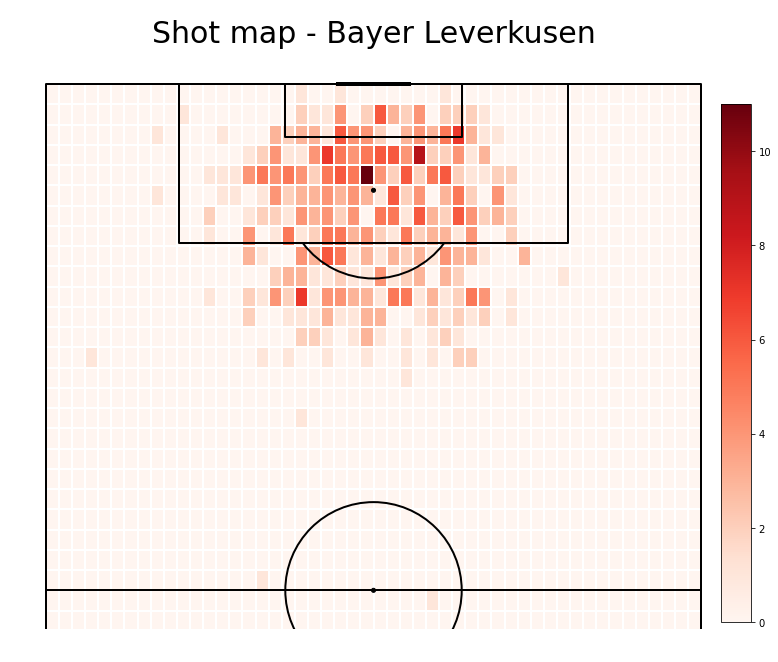

In [55]:
pitch = VerticalPitch(line_color='black', half=True, pitch_type='custom', 
                      pitch_length=105, pitch_width=68, line_zorder=2)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Calculate number of shots in each bin
bin_statistic_shots = pitch.bin_statistic(shots.X, shots.Y, bins=50)

# Create heatmap
pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth=0.01)

# Create color bar for the heatmap
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)

# Add title
fig.suptitle('Shot map - Bayer Leverkusen', fontsize=30)

# Show plot
plt.show()

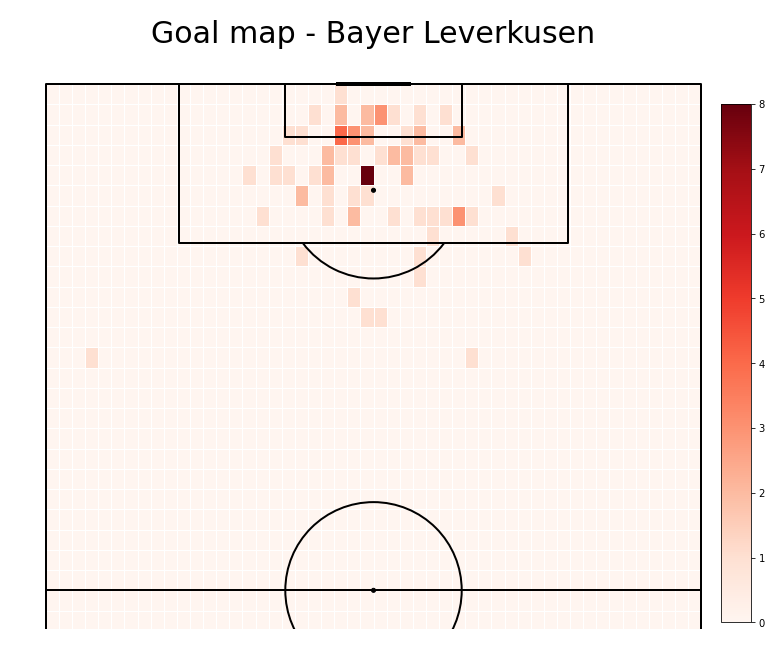

In [56]:
goals = shots.loc[shots["Goal"] == 1]

# Create pitch
pitch = VerticalPitch(line_color='black', half=True, pitch_type='custom',
                      pitch_length=105, pitch_width=68, line_zorder=2)

# Set up figure and axes
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(goals.X, goals.Y, bins=50)

# Plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')

# Add color bar for the heatmap
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)

# Add title
fig.suptitle('Goal map - Bayer Leverkusen', fontsize=30)

# Show plot
plt.show()

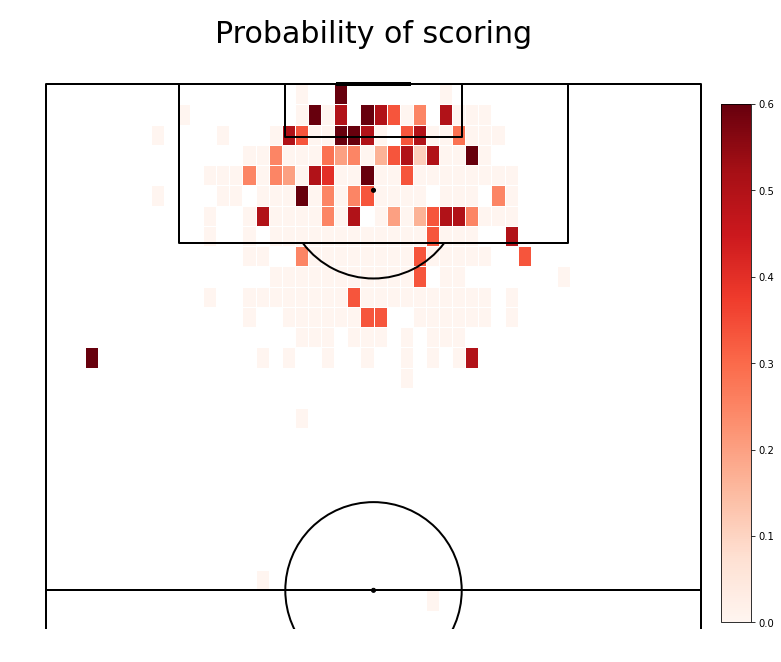

In [57]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(shots.X, shots.Y, bins = 50)
#normalize number of goals by number of shots 
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

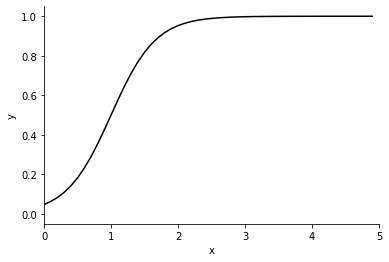

In [58]:
b = [3, -3]
x = np.arange(5, step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x))
fig,ax = plt.subplots()
plt.ylim((-0.05,1.05))
plt.xlim((0,5))
ax.set_ylabel('y')
ax.set_xlabel("x") 
ax.plot(x, y, linestyle='solid', color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

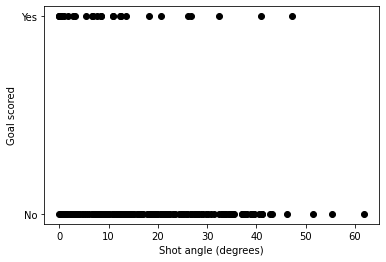

In [59]:
#first 200 shots
shots_200=shots.iloc[:200]
#plot first 200 shots goal angle
fig, ax = plt.subplots()
ax.plot(shots_200['Angle']*180/np.pi, shots_200['Goal'], linestyle='none', marker= '.', markersize= 12, color='black')
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

In [60]:
goals['Angle'].unique

<bound method Series.unique of 4100    0.000000
4110    0.048546
4112    0.005337
4118    0.216790
4119    0.360166
          ...   
4193    0.147689
4197    0.197710
3516    0.137149
3518    0.014632
3524    0.228723
Name: Angle, Length: 86, dtype: float64>

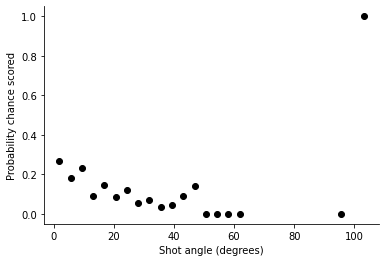

In [61]:
#number of shots from angle
shotcount_dist = np.histogram(shots['Angle']*180/np.pi, bins=40, range=[0, 150])
#number of goals from angle
goalcount_dist = np.histogram(goals['Angle']*180/np.pi, bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')
#probability of scoring goal
prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2
#make plot
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

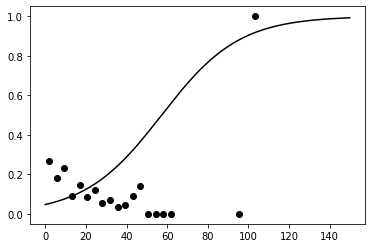

In [62]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180)) 
#plot line
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot logistic function
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

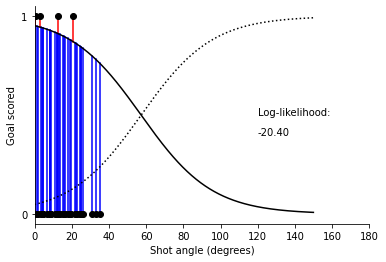

In [63]:
#calculate xG
xG = 1/(1+np.exp(b[0]+b[1]*shots['Angle'])) 
shots = shots.assign(xG = xG)
shots_40 = shots.iloc[:40]
fig, ax = plt.subplots()
#plot data
ax.plot(shots_40['Angle']*180/np.pi, shots_40['Goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
#plot curves
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
#calculate loglikelihood
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['Angle'] * 180/np.pi
    if shot['Goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['Goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['Goal'], 1-shot['xG']], color='blue', zorder = 1) 
#make legend
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:') 
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                  623
Model:                            GLM   Df Residuals:                      621
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -241.99
Date:                Fri, 09 Aug 2024   Deviance:                       483.99
Time:                        20:05:09   Pearson chi2:                     821.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02558
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1686      0.194     -6.010      0.0

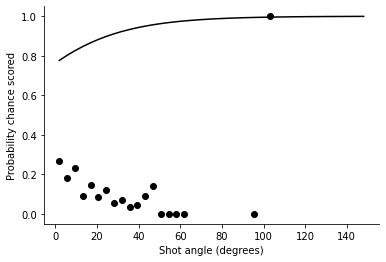

In [64]:
#create model
test_model = smf.glm(formula="Goal ~ Angle" , data=shots, 
                           family=sm.families.Binomial()).fit()
print(test_model.summary())
#get params        
b=test_model.params
#calculate xG
xGprob = 1/(1+np.exp(b[0]+b[1]*midangle*np.pi/180)) 
fig, ax = plt.subplots()
#plot data
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
#plot line
ax.plot(midangle, xGprob, linestyle='solid', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                  623
Model:                            GLM   Df Residuals:                      621
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.09
Date:                Fri, 09 Aug 2024   Deviance:                       466.18
Time:                        20:05:12   Pearson chi2:                     631.
No. Iterations:                     6   Pseudo R-squ. (CS):            0.05304
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.6364      2.082     -6.069      0.0

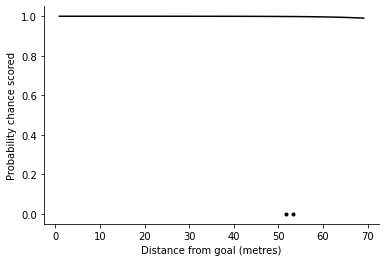

In [65]:
#number of shots
shotcount_dist = np.histogram(shots['Distance'],bins=40,range=[0, 70])
#number of goals
goalcount_dist = np.histogram(goals['Distance'],bins=40,range=[0, 70])
#empirical probability of scoring
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
#making a plot
fig, ax = plt.subplots()
#plotting data
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#making legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#make single variable model of distance
test_model = smf.glm(formula="Goal ~ Distance" , data=shots, 
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())        
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance)) 
#plot line
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                  623
Model:                            GLM   Df Residuals:                      620
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.06
Date:                Fri, 09 Aug 2024   Deviance:                       466.12
Time:                        20:05:15   Pearson chi2:                     625.
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05313
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3765     24.480     -0.260      0.7

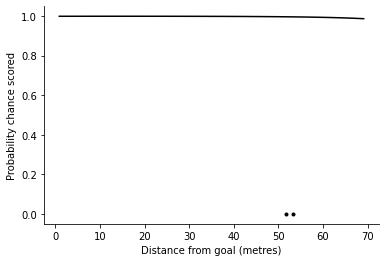

In [66]:
#calculating distance squared
shots["D2"] = shots['Distance']**2
#adding it to the model
test_model = smf.glm(formula="Goal ~ Distance + D2" , data=shots, 
                           family=sm.families.Binomial()).fit()
#print model summary
print(test_model.summary()) 
#get parameters       
b=test_model.params
#calculate xG
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2))) 
fig, ax = plt.subplots()
#plot line
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
#make legend
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.88
Date:                Fri, 09 Aug 2024   Deviance:                       435.76
Time:                        20:05:21   Pearson chi2:                     667.
No. Iterations:                     9   Pseudo R-squ. (CS):            0.09818
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.8179     39.270      0.556      0.5

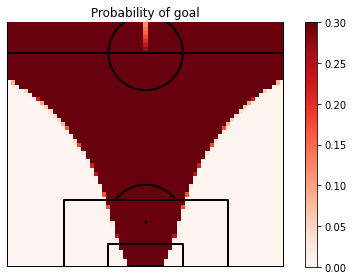

In [67]:
#creating extra variables
shots["X2"] = shots['X']**2
shots["C2"] = shots['C']**2
shots["AX"]  = shots['Angle']*shots['X']

# list the model variables you want here
model_variables = ['Angle','Distance','X','C', "X2", "C2", "AX"]
model=''
for v in model_variables[:-1]:
    model = model  + v + ' + '
model = model + model_variables[-1]

#fit the model
test_model = smf.glm(formula="Goal ~ " + model, data=shots, 
                           family=sm.families.Binomial()).fit()
#print summary
print(test_model.summary())        
b=test_model.params

#return xG value for more general model
def calculate_xG(sh):    
   bsum=b[0]
   for i,v in enumerate(model_variables):
       bsum=bsum+b[i+1]*sh[v]
   xG = 1/(1+np.exp(bsum)) 
   return xG   

#add an xG to my dataframe
xG=shots.apply(calculate_xG, axis=1) 
shots = shots.assign(xG=xG)

#Create a 2D map of xG
pgoal_2d=np.zeros((68,68))
for x in range(68):
    for y in range(68):
        sh=dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-68/2)**2 - (7.32/2)**2))
        if a<0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-68/2)**2)
        sh['D2'] = x**2 + abs(y-68/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-68/2)
        sh['C2'] = (y-68/2)**2
        
        pgoal_2d[x,y] =  calculate_xG(sh)

#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.draw()
#plot probability
pos = ax.imshow(pgoal_2d, extent=[-1,68,68,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.3, zorder = 1)
fig.colorbar(pos, ax=ax)
#make legend
ax.set_title('Probability of goal')
plt.xlim((0,68))
plt.ylim((0,60))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Mcfaddens Rsquared 0.12481836353092401


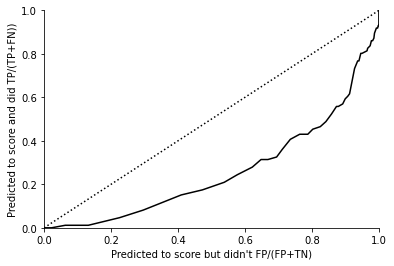

In [51]:
# Mcfaddens Rsquared for Logistic regression
null_model = smf.glm(formula="Goal ~ 1 ", data=shots,
                     family=sm.families.Binomial()).fit()
print("Mcfaddens Rsquared", 1 - test_model.llf / null_model.llf)

# ROC curve
numobs = 100
TP = np.zeros(numobs)
FP = np.zeros(numobs)
TN = np.zeros(numobs)
FN = np.zeros(numobs)

for i, threshold in enumerate(np.arange(0, 1, 1 / numobs)):
    for j, shot in shots.iterrows():
        if (shot['Goal'] == 1):
            if (shot['xG'] > threshold):
                TP[i] = TP[i] + 1
            else:
                FN[i] = FN[i] + 1
        if (shot['Goal'] == 0):
            if (shot['xG'] > threshold):
                FP[i] = FP[i] + 1
            else:
                TN[i] = TN[i] + 1

fig, ax = plt.subplots()
ax.plot(FP / (FP + TN), TP / (TP + FN), color='black')
ax.plot([0, 1], [0, 1], linestyle='dotted', color='black')
ax.set_ylabel("Predicted to score and did TP/(TP+FN))")
ax.set_xlabel("Predicted to score but didn't FP/(FP+TN)")
plt.ylim((0.00, 1.00))
plt.xlim((0.00, 1.00))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)